In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Data Import

In [3]:
df_17 = pd.read_csv("global-reduced_genre_network-2017.csv", sep = "\t")
df_18 = pd.read_csv("global-reduced_genre_network-2018.csv", sep = "\t")
df_19 = pd.read_csv("global-reduced_genre_network-2019.csv", sep = "\t")

In [194]:
# df_20 = pd.read_csv("Genre_Collaboration2020.csv")
# df_21 = pd.read_csv("Genre_Collaboration2021.csv")

In [195]:
# df_20 = df_20.drop(columns='Unnamed: 0', axis=0)
# df_21 = df_21.drop(columns='Unnamed: 0', axis=0)

In [198]:
# df_20 = df_20.rename(columns = {'G1': 'source', 'G2': 'target', 'Count': 'weight'})
# df_21 = df_21.rename(columns = {'G1': 'source', 'G2': 'target', 'Count': 'weight'})

In [4]:
max_weight_17 = df_17['weight'].max()
max_weight_18 = df_18['weight'].max()
max_weight_19 = df_19['weight'].max()

In [200]:
# max_weight_20 = df_20['weight'].max()
# max_weight_21 = df_21['weight'].max()

In [5]:
df_17['normalized_weight'] = df_17['weight'] / max_weight_17
df_18['normalized_weight'] = df_18['weight'] / max_weight_18
df_19['normalized_weight'] = df_19['weight'] / max_weight_19

In [201]:
# df_20['normalized_weight'] = df_20['weight'] / max_weight_20
# df_21['normalized_weight'] = df_21['weight'] / max_weight_21

In [6]:
# 2017

df_17.head()

,source,target,weight,avg_streams,normalized_weight
0,pop rap,rap,335,5.572952e+07,1.000000
1,hip hop,rap,335,6.050773e+07,1.000000
2,hip hop,pop rap,284,5.961380e+07,0.847761
3,rap,trap,278,6.841118e+07,0.829851
4,hip hop,trap,264,6.452061e+07,0.788060


In [7]:
# 2018

df_18.head()

,source,target,weight,avg_streams,normalized_weight
0,hip hop,rap,452,6.343996e+07,1.000000
1,rap,trap,359,7.340500e+07,0.794248
2,pop rap,rap,339,5.870225e+07,0.750000
3,hip hop,trap,335,6.351165e+07,0.741150
4,hip hop,pop rap,286,5.630579e+07,0.632743


In [8]:
# 2019

df_19.head()

,source,target,weight,avg_streams,normalized_weight
0,latin,reggaeton,553,1.060915e+08,1.000000
1,hip hop,rap,406,5.093254e+07,0.734177
2,pop,pop,299,8.895246e+07,0.540687
3,rap,trap,297,6.818712e+07,0.537071
4,hip hop,trap,293,6.986488e+07,0.529837


In [9]:
print("The shape of 2017 Dataset is ", df_17.shape)
print("The shape of 2018 Dataset is ", df_18.shape)
print("The shape of 2019 Dataset is ", df_19.shape)

The shape of 2017 Dataset is  (564, 5)
The shape of 2018 Dataset is  (583, 5)
The shape of 2019 Dataset is  (709, 5)


Because there were changes to genre tagging on the spotipy API, there are some differences in number of genres with gathered dataset by the published paper. Thus, even though I have collected more data for 2020 and 2021, I have decided not to include in the project.

In [204]:
print("The shape of 2020 Dataset is ", df_20.shape)
print("The shape of 2021 Dataset is ", df_21.shape)

The shape of 2020 Dataset is  (393, 4)
The shape of 2021 Dataset is  (374, 4)


In [10]:
g_17 = nx.from_pandas_edgelist(df_17, 'source', 'target', ['weight'])
g_18 = nx.from_pandas_edgelist(df_18, 'source', 'target', ['weight'])
g_19 = nx.from_pandas_edgelist(df_19, 'source', 'target', ['weight'])

In [10]:
nx.write_gexf(g_17, "Genre_2017.gexf")
nx.write_gexf(g_18, "Genre_2018.gexf")
nx.write_gexf(g_19, "Genre_2019.gexf")

The network graph will be drawn using Gephi with exported gexf files.

## Exploratory Data Analysis

In [11]:
#number of nodes
node_num_2017 = len(g_17)
node_num_2018 = len(g_18)
node_num_2019 = len(g_19)

print(f"The 2017 graph has {node_num_2017} nodes")
print(f"The 2018 graph has {node_num_2018} nodes")
print(f"The 2019 graph has {node_num_2019} nodes")

The 2017 graph has 72 nodes
The 2018 graph has 79 nodes
The 2019 graph has 89 nodes


In [12]:
#number of edges
edge_num_2017 = g_17.number_of_edges()
edge_num_2018 = g_18.number_of_edges()
edge_num_2019 = g_19.number_of_edges()

print(f"The 2017 graph has {edge_num_2017} edges")
print(f"The 2018 graph has {edge_num_2018} edges")
print(f"The 2019 graph has {edge_num_2019} edges")

The 2017 graph has 564 edges
The 2018 graph has 583 edges
The 2019 graph has 709 edges


In [13]:
#average degree
avg_deg_2017 = sum(dict(g_17.degree()).values()) / len(g_17)
avg_deg_2018 = sum(dict(g_18.degree()).values()) / len(g_18)
avg_deg_2019 = sum(dict(g_19.degree()).values()) / len(g_19)

print(f"The 2017 graph has average degree of {avg_deg_2017: .3f}")
print(f"The 2018 graph has average degree of {avg_deg_2018: .3f}")
print(f"The 2019 graph has average degree of {avg_deg_2019: .3f}")

The 2017 graph has average degree of  15.667
The 2018 graph has average degree of  14.759
The 2019 graph has average degree of  15.933


In [14]:
#weighted average degree
deg_dict_17 = dict(g_17.degree(weight='weight'))
deg_dict_18 = dict(g_18.degree(weight='weight'))
deg_dict_19 = dict(g_19.degree(weight='weight'))

avg_weighted_deg_2017 = sum(deg_dict_17.values())/len(deg_dict_17)
avg_weighted_deg_2018 = sum(deg_dict_18.values())/len(deg_dict_18)
avg_weighted_deg_2019 = sum(deg_dict_19.values())/len(deg_dict_19)

print(f"The graph has weighted average degree of {avg_weighted_deg_2017: .3f}")
print(f"The graph has weighted average degree of {avg_weighted_deg_2018: .3f}")
print(f"The graph has weighted average degree of {avg_weighted_deg_2019: .3f}")

The graph has weighted average degree of  256.917
The graph has weighted average degree of  247.418
The graph has weighted average degree of  236.697


In [15]:
degrees_17 = [g_17.degree(n) for n in g_17.nodes()]
degrees_18 = [g_18.degree(n) for n in g_18.nodes()]
degrees_19 = [g_19.degree(n) for n in g_19.nodes()]


#degree distribution
dist_17 = np.bincount(degrees_17)
dist_18 = np.bincount(degrees_18)
dist_19 = np.bincount(degrees_19)

ccdf_17 = 1 - np.cumsum(dist_17) / sum(dist_17)
ccdf_18 = 1 - np.cumsum(dist_18) / sum(dist_18)
ccdf_19 = 1 - np.cumsum(dist_19) / sum(dist_19)

Text(0.5, 1.0, '2017')

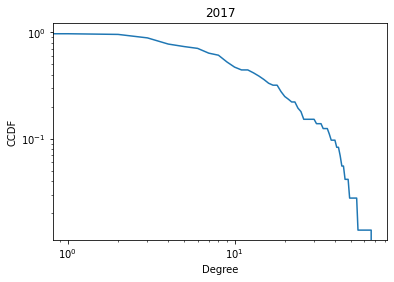

In [16]:
plt.loglog(range(len(ccdf_17)), ccdf_17)
plt.xlabel("Degree")
plt.ylabel("CCDF")
plt.title("2017")

Text(0.5, 1.0, '2018')

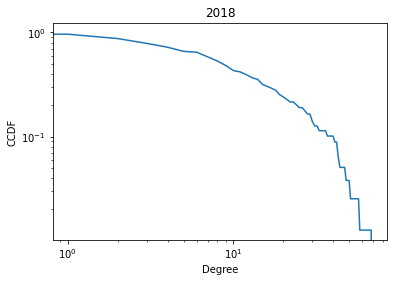

In [17]:
plt.loglog(range(len(ccdf_18)), ccdf_18)
plt.xlabel("Degree")
plt.ylabel("CCDF")
plt.title("2018")

Text(0.5, 1.0, '2019')

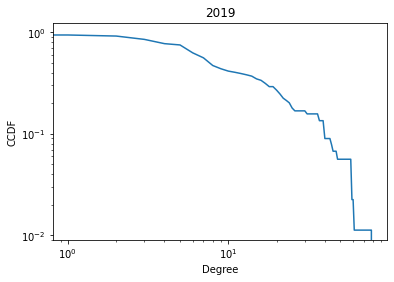

In [18]:
plt.loglog(range(len(ccdf_19)), ccdf_19)
plt.xlabel("Degree")
plt.ylabel("CCDF")
plt.title("2019")

In [19]:
#average clustering coefficient
avg_cc_2017 = nx.average_clustering(g_17)
avg_cc_2018 = nx.average_clustering(g_18)
avg_cc_2019 = nx.average_clustering(g_19)

print(f"Average clustering coefficient of 2017 graph is {avg_cc_2017: .3f}")
print(f"Average clustering coefficient of 2018 graph is {avg_cc_2018: .3f}")
print(f"Average clustering coefficient of 2019 graph is {avg_cc_2019: .3f}")

Average clustering coefficient of 2017 graph is  0.743
Average clustering coefficient of 2018 graph is  0.757
Average clustering coefficient of 2019 graph is  0.754


In [20]:
# number of self-loops
num_self_loops_17 = nx.number_of_selfloops(g_17)
num_self_loops_18 = nx.number_of_selfloops(g_18)
num_self_loops_19 = nx.number_of_selfloops(g_19)

print(f"Number of Self Loops in 2017 is {num_self_loops_17}")
print(f"Number of Self Loops in 2018 is {num_self_loops_18}")
print(f"Number of Self Loops in 2019 is {num_self_loops_19}")

Number of Self Loops in 2017 is 24
Number of Self Loops in 2018 is 21
Number of Self Loops in 2019 is 28


In [21]:
eda_df = pd.DataFrame(columns=['Nodes', 'Edges', 'Avg Degree', 
                      'Avg Weighted Deg', 'Clustering Coefficient', 'Self-Loops'])
eda_df['Nodes'] = [node_num_2017, node_num_2018, node_num_2019]
eda_df['Edges'] = [edge_num_2017, edge_num_2018, edge_num_2019]
eda_df['Avg Degree'] = [avg_deg_2017, avg_deg_2018, avg_deg_2019]
eda_df['Avg Weighted Deg'] = [avg_weighted_deg_2017, avg_weighted_deg_2018, avg_weighted_deg_2019]
eda_df['Clustering Coefficient'] = [avg_cc_2017, avg_cc_2018, avg_cc_2019]
eda_df['Self-Loops'] = [num_self_loops_17, num_self_loops_18, num_self_loops_19]

eda_df

,Nodes,Edges,Avg Degree,Avg Weighted Deg,Clustering Coefficient,Self-Loops
0,72,564,15.666667,256.916667,0.742602,24
1,79,583,14.759494,247.417722,0.756991,21
2,89,709,15.932584,236.696629,0.754027,28


In [22]:
eda_df = eda_df.rename(index={0: '2017', 1: '2018', 2: '2019'})

In [23]:
eda_df.T

,2017,2018,2019
Nodes,72.000000,79.000000,89.000000
Edges,564.000000,583.000000,709.000000
Avg Degree,15.666667,14.759494,15.932584
Avg Weighted Deg,256.916667,247.417722,236.696629
Clustering Coefficient,0.742602,0.756991,0.754027
Self-Loops,24.000000,21.000000,28.000000


## Network Metrics

### Preferential Attachment

In [24]:
#preferential attachment
pa_17 = nx.preferential_attachment(g_17)
pa_18 = nx.preferential_attachment(g_18)
pa_19 = nx.preferential_attachment(g_19)

In [25]:
pa_result_17 = pd.DataFrame(columns=['source', 'target', 'preferential_attachment'])
for i, row in df_17.iterrows():
    source = row['source']
    target = row['target']
    preferential_attachment = list(nx.preferential_attachment(g_17, [(source, target)]))[0][2]
    pa_result_17.loc[i] = [source, target, preferential_attachment]


In [26]:
pa_result_18 = pd.DataFrame(columns=['source', 'target', 'preferential_attachment'])
for i, row in df_18.iterrows():
    source = row['source']
    target = row['target']
    preferential_attachment = list(nx.preferential_attachment(g_18, [(source, target)]))[0][2]
    pa_result_18.loc[i] = [source, target, preferential_attachment]


In [27]:
pa_result_19 = pd.DataFrame(columns=['source', 'target', 'preferential_attachment'])
for i, row in df_19.iterrows():
    source = row['source']
    target = row['target']
    preferential_attachment = list(nx.preferential_attachment(g_19, [(source, target)]))[0][2]
    pa_result_19.loc[i] = [source, target, preferential_attachment]


In [28]:
pa_result_17.head()

,source,target,preferential_attachment
0,pop rap,rap,1978
1,hip hop,rap,2107
2,hip hop,pop rap,2254
3,rap,trap,1634
4,hip hop,trap,1862


In [29]:
pa_result_18.head()

,source,target,preferential_attachment
0,hip hop,rap,2958
1,rap,trap,2193
2,pop rap,rap,2244
3,hip hop,trap,2494
4,hip hop,pop rap,2552


In [30]:
pa_result_19.head()

,source,target,preferential_attachment
0,latin,reggaeton,1600
1,hip hop,rap,3599
2,pop,pop,6241
3,rap,trap,2928
4,hip hop,trap,2832


### Common Neighbors

In [31]:
common_neigh_17 = pd.DataFrame(columns=['source', 'target', 'num_common_neighbors'])
common_neigh_18 = pd.DataFrame(columns=['source', 'target', 'num_common_neighbors'])
common_neigh_19 = pd.DataFrame(columns=['source', 'target', 'num_common_neighbors'])

for i, row in df_17.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_17 = len(set(nx.common_neighbors(g_17, source, target)))
    common_neigh_17.loc[i] = [source, target, common_neighbors_17]

for i, row in df_18.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_18 = len(set(nx.common_neighbors(g_18, source, target)))
    common_neigh_18.loc[i] = [source, target, common_neighbors_18]

for i, row in df_19.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_19 = len(set(nx.common_neighbors(g_19, source, target)))
    common_neigh_19.loc[i] = [source, target, common_neighbors_19]

### Neighborhood Overlap

In [32]:
#neighborhood overlap

neigh_overlap_17 = pd.DataFrame(columns=['source', 'target', 'neighborhood_overlap'])
neigh_overlap_18 = pd.DataFrame(columns=['source', 'target', 'neighborhood_overlap'])
neigh_overlap_19 = pd.DataFrame(columns=['source', 'target', 'neighborhood_overlap'])

for i, row in df_17.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_17 = len(set(nx.common_neighbors(g_17, source, target)))
    n_join_nbrs_17 = g_17.degree(source) + g_17.degree(target) - common_neighbors_17 - 2
    no_17 = common_neighbors_17 / n_join_nbrs_17
    neigh_overlap_17.loc[i] = [source, target, no_17]

for i, row in df_18.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_18 = len(set(nx.common_neighbors(g_18, source, target)))
    n_join_nbrs_18 = g_18.degree(source) + g_18.degree(target) - common_neighbors_18 - 2
    no_18 = common_neighbors_18 / n_join_nbrs_18
    neigh_overlap_18.loc[i] = [source, target, no_18]

for i, row in df_19.iterrows():
    source = row['source']
    target = row['target']
    common_neighbors_19 = len(set(nx.common_neighbors(g_19, source, target)))
    n_join_nbrs_19 = g_19.degree(source) + g_19.degree(target) - common_neighbors_19 - 2
    no_19 = common_neighbors_19 / n_join_nbrs_19
    neigh_overlap_19.loc[i] = [source, target, no_19]

### Edge Betweenness

In [33]:
#edge betweenness

betweenness_17 = nx.edge_betweenness_centrality(g_17)
betweenness_18 = nx.edge_betweenness_centrality(g_18)
betweenness_19 = nx.edge_betweenness_centrality(g_19)

In [34]:
btw_df17 = pd.DataFrame(betweenness_17.items(), columns = ['edges', 'betweenness'])
btw_df17[['source', 'target']] = pd.DataFrame(btw_df17['edges'].tolist())
btw_df17.drop('edges', axis=1, inplace=True)
btw_df17 = btw_df17[['source', 'target', 'betweenness']]

btw_df18 = pd.DataFrame(betweenness_18.items(), columns = ['edges', 'betweenness'])
btw_df18[['source', 'target']] = pd.DataFrame(btw_df18['edges'].tolist())
btw_df18.drop('edges', axis=1, inplace=True)
btw_df18 = btw_df18[['source', 'target', 'betweenness']]

btw_df19 = pd.DataFrame(betweenness_19.items(), columns = ['edges', 'betweenness'])
btw_df19[['source', 'target']] = pd.DataFrame(btw_df19['edges'].tolist())
btw_df19.drop('edges', axis=1, inplace=True)
btw_df19 = btw_df19[['source', 'target', 'betweenness']]


### Resource Allocation

In [35]:
# resource allocation
ra_17 = nx.resource_allocation_index(g_17)
ra_18 = nx.resource_allocation_index(g_18)
ra_19 = nx.resource_allocation_index(g_19)

In [36]:
ra_result_17 = pd.DataFrame(columns=['source', 'target', 'resource_allocation'])
ra_result_18 = pd.DataFrame(columns=['source', 'target', 'resource_allocation'])
ra_result_19 = pd.DataFrame(columns=['source', 'target', 'resource_allocation'])

for i, row in df_17.iterrows():
    source = row['source']
    target = row['target']
    ra = list(nx.resource_allocation_index(g_17, [(source, target)]))[0][2]
    ra_result_17.loc[i] = [source, target, ra]

for i, row in df_18.iterrows():
    source = row['source']
    target = row['target']
    ra = list(nx.resource_allocation_index(g_18, [(source, target)]))[0][2]
    ra_result_18.loc[i] = [source, target, ra]
    
for i, row in df_19.iterrows():
    source = row['source']
    target = row['target']
    ra = list(nx.resource_allocation_index(g_19, [(source, target)]))[0][2]
    ra_result_19.loc[i] = [source, target, ra]

The values for resource allocations appears to be more than ranged between 0 and 1 due to self-loops.

### Final Dataset

In [37]:
df_17_final = ra_result_17.copy()
final_2017 = df_17_final.merge(neigh_overlap_17, on = ['source', 'target']).merge(common_neigh_17, on = ['source', 'target']).merge(pa_result_17, on = ['source', 'target'])
final_2017 = final_2017.merge(df_17, on = ['source', 'target'])
final_2017 = final_2017.drop(columns=['avg_streams', 'normalized_weight'])
final_2017 = final_2017.merge(btw_df17, on = ['source', 'target'])

In [79]:
final_2017.head()

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,pop rap,rap,2.815387,0.851064,40,1978,335,0.000548
1,rap,trap,1.899364,0.680851,32,1634,278,0.000920
2,hip hop,trap,2.227608,0.700000,35,1862,264,0.001030
3,dance pop,pop,4.430389,0.739130,51,3685,253,0.002220
4,hip hop,pop,3.139335,0.605634,43,3283,246,0.004939


In [64]:
final_2017.sort_values(by='weight', ascending=False).head(5)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,pop rap,rap,2.815387,0.851064,40,1978,335,0.000548
1,rap,trap,1.899364,0.680851,32,1634,278,0.000920
2,hip hop,trap,2.227608,0.700000,35,1862,264,0.001030
3,dance pop,pop,4.430389,0.739130,51,3685,253,0.002220
4,hip hop,pop,3.139335,0.605634,43,3283,246,0.004939


In [60]:
#weight

w_min17 = final_2017['weight'].min()
final_2017.loc[final_2017['weight'] == w_min17]

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
176,new wave,punk,0.000000,0.000000,0,14,1,0.027778
177,latin,r&b,0.418158,0.289474,11,650,1,0.001774
178,dance pop,francoton,0.186471,0.111111,6,385,1,0.005273
179,dance pop,dubstep,0.144296,0.055556,3,220,1,0.009217
180,dance pop,disco house,0.062043,0.055556,3,220,1,0.006853
...,...,...,...,...,...,...,...,...
251,country,lounge,0.144218,0.200000,3,91,1,0.001445
252,dance pop,lounge,0.241421,0.071429,4,385,1,0.009510
253,house,pop rock,0.361142,0.419355,13,465,1,0.001080
254,dance,pop rock,0.351734,0.541667,13,360,1,0.000776


In [70]:
final_2017.sort_values(by='betweenness', ascending=False).head(5)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
176,new wave,punk,0.000000,0.000000,0,14,1,0.027778
212,pop,swing,0.253968,0.030303,2,201,1,0.025881
221,pop,psychedelic rock,0.045455,0.014925,1,201,1,0.024645
183,hip hop,soca,0.134298,0.062500,3,196,1,0.016406
117,pop,vallenato,0.099848,0.045455,3,268,3,0.013954


In [71]:
final_2017.sort_values(by='neighborhood_overlap', ascending=False).head(5)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
6,pop,pop,7.912459,0.970149,65,4489,221,0.0
21,dance pop,dance pop,4.556425,0.963636,53,3025,75,0.0
9,hip hop,hip hop,3.765371,0.959184,47,2401,159,0.0
10,pop rap,pop rap,3.176738,0.956522,44,2116,146,0.0
48,electro,electro,2.911764,0.954545,42,1936,20,0.0


In [72]:
final_2017.sort_values(by='preferential_attachment', ascending=False).head(5)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
6,pop,pop,7.912459,0.970149,65,4489,221,0.000000
3,dance pop,pop,4.430389,0.739130,51,3685,253,0.002220
4,hip hop,pop,3.139335,0.605634,43,3283,246,0.004939
21,dance pop,dance pop,4.556425,0.963636,53,3025,75,0.000000
11,pop,tropical house,2.681513,0.536232,37,2747,139,0.003719


In [73]:
final_2017.sort_values(by='num_common_neighbors', ascending=False).head(5)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
6,pop,pop,7.912459,0.970149,65,4489,221,0.00000
21,dance pop,dance pop,4.556425,0.963636,53,3025,75,0.00000
3,dance pop,pop,4.430389,0.739130,51,3685,253,0.00222
9,hip hop,hip hop,3.765371,0.959184,47,2401,159,0.00000
10,pop rap,pop rap,3.176738,0.956522,44,2116,146,0.00000


In [212]:
final_2017.sort_values(by='resource_allocation', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
6,pop,pop,7.912459,0.970149,65,4489,221,0.0


In [80]:
df_18_final = ra_result_18.copy()
final_2018 = df_18_final.merge(neigh_overlap_18, on = ['source', 'target']).merge(common_neigh_18, on = ['source', 'target']).merge(pa_result_18, on = ['source', 'target'])
final_2018 = final_2018.merge(df_18, on = ['source', 'target'])
final_2018 = final_2018.drop(columns=['avg_streams', 'normalized_weight'])
final_2018 = final_2018.merge(btw_df18, on = ['source', 'target'])

final_2018.head()

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,hip hop,rap,4.767932,0.783333,47,2958,452,0.000964
1,rap,trap,2.851555,0.703704,38,2193,359,0.001265
2,hip hop,trap,3.203922,0.677966,40,2494,335,0.001597
3,hip hop,pop rap,2.861602,0.666667,40,2552,286,0.001694
4,pop,pop,9.303781,0.971014,67,4761,276,0.000000


In [51]:
final_2018.sort_values(by='weight', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,hip hop,rap,4.767932,0.783333,47,2958,452,0.000964


In [52]:
final_2018.sort_values(by='weight', ascending=True).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
241,latin,rock,0.246957,0.243902,10,682,1,0.004517


In [215]:
final_2018.sort_values(by='betweenness', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
237,pop,sertanejo,0.158824,0.028986,2,276,1,0.041307


In [53]:
final_2018.sort_values(by='betweenness', ascending=True).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
56,electropop,electropop,2.225702,0.945946,35,1369,11,0.0


In [216]:
final_2018.sort_values(by='preferential_attachment', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
4,pop,pop,9.303781,0.971014,67,4761,276,0.0


In [54]:
final_2018.sort_values(by='preferential_attachment', ascending=True).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
212,pagode,sertanejo,0.0,0.0,0,4,1,0.025316


In [217]:
final_2018.sort_values(by='num_common_neighbors', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
4,pop,pop,9.303781,0.971014,67,4761,276,0.0


In [55]:
final_2018.sort_values(by='num_common_neighbors', ascending=True).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
212,pagode,sertanejo,0.0,0.0,0,4,1,0.025316


In [218]:
final_2018.sort_values(by='neighborhood_overlap', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
4,pop,pop,9.303781,0.971014,67,4761,276,0.0


In [56]:
final_2018.sort_values(by='neighborhood_overlap', ascending=True).head(1)


,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
212,pagode,sertanejo,0.0,0.0,0,4,1,0.025316


In [219]:
final_2018.sort_values(by='resource_allocation', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
4,pop,pop,9.303781,0.971014,67,4761,276,0.0


In [57]:
final_2018.sort_values(by='resource_allocation', ascending=True).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
212,pagode,sertanejo,0.0,0.0,0,4,1,0.025316


In [81]:
df_19_final = ra_result_19.copy()
final_2019 = df_19_final.merge(neigh_overlap_19, on = ['source', 'target']).merge(common_neigh_19, on = ['source', 'target']).merge(pa_result_19, on = ['source', 'target'])
final_2019 = final_2019.merge(df_19, on = ['source', 'target'])
final_2019 = final_2019.drop(columns=['avg_streams', 'normalized_weight'])
final_2019 = final_2019.merge(btw_df19, on = ['source', 'target'])

final_2019.head()

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,latin,reggaeton,2.519950,0.902439,37,1600,553,0.000255
1,hip hop,rap,4.369097,0.761194,51,3599,406,0.001770
2,pop,pop,9.230085,0.974684,77,6241,299,0.000000
3,rap,trap,3.382966,0.671875,43,2928,297,0.001432
4,hip hop,trap,3.457980,0.666667,42,2832,293,0.000884


In [214]:
final_2019.sort_values(by='weight', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
0,latin,reggaeton,2.51995,0.902439,37,1600,553,0.000255


In [220]:
final_2019.sort_values(by='betweenness', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
273,pop,sertanejo,0.3,0.025316,2,316,1,0.038


In [221]:
final_2019.sort_values(by='preferential_attachment', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
2,pop,pop,9.230085,0.974684,77,6241,299,0.0


In [222]:
final_2019.sort_values(by='num_common_neighbors', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
2,pop,pop,9.230085,0.974684,77,6241,299,0.0


In [223]:
final_2019.sort_values(by='neighborhood_overlap', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
2,pop,pop,9.230085,0.974684,77,6241,299,0.0


In [224]:
final_2019.sort_values(by='resource_allocation', ascending=False).head(1)

,source,target,resource_allocation,neighborhood_overlap,num_common_neighbors,preferential_attachment,weight,betweenness
2,pop,pop,9.230085,0.974684,77,6241,299,0.0


## Factor Analysis

In [82]:
# Numerical Data types selection

num_fac17 = final_2017.select_dtypes(include=[np.number])
num_fac18 = final_2018.select_dtypes(include=[np.number])
num_fac19 = final_2019.select_dtypes(include=[np.number])

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_num_fac17 = pd.DataFrame(scaler.fit_transform(num_fac17), 
                                columns=num_fac17.columns)

scaled_num_fac18 = pd.DataFrame(scaler.fit_transform(num_fac18), 
                                columns=num_fac18.columns)

scaled_num_fac19 = pd.DataFrame(scaler.fit_transform(num_fac19), 
                                columns=num_fac19.columns)

### Determining number of factors

In [77]:
def _HornParallelAnalysis(data, K=10, printEigenvalues=False):
    ################
    # Create a random matrix to match the dataset
    ################
    n, m = data.shape
    # Set the factor analysis parameters
    fa = FactorAnalyzer(n_factors=1, method='minres', rotation=None, use_smc=True)
    # Create arrays to store the values
    sumComponentEigens = np.empty(m)
    sumFactorEigens = np.empty(m)
    # Run the fit 'K' times over a random matrix
    for runNum in range(0, K):
        fa.fit(np.random.normal(size=(n, m)))
        sumComponentEigens = sumComponentEigens + fa.get_eigenvalues()[0]
        sumFactorEigens = sumFactorEigens + fa.get_eigenvalues()[1]
    # Average over the number of runs
    avgComponentEigens = sumComponentEigens / K
    avgFactorEigens = sumFactorEigens / K

    ################
    # Get the eigenvalues for the fit on supplied data
    ################
    fa.fit(data)
    dataEv = fa.get_eigenvalues()
    # Set up a scree plot
    plt.figure(figsize=(8, 6))

    ################
    ### Print results
    ################
    if printEigenvalues:
        print('Principal component eigenvalues for random matrix:\n', avgComponentEigens)
        print('Factor eigenvalues for random matrix:\n', avgFactorEigens)
        print('Principal component eigenvalues for data:\n', dataEv[0])
        print('Factor eigenvalues for data:\n', dataEv[1])
    # Find the suggested stopping points
    suggestedFactors = sum((dataEv[1] - avgFactorEigens) > 0)
    print('Parallel analysis suggests that the number of factors = ', suggestedFactors)


    ################
    ### Plot the eigenvalues against the number of variables
    ################
    # Line for eigenvalue 1
    plt.plot([0, m+1], [1, 1], 'k--', alpha=0.3)
    # For the random data - Components
    plt.plot(range(1, m+1), avgComponentEigens, 'b', label='PC - random', alpha=0.4)
    # For the Data - Components
    plt.scatter(range(1, m+1), dataEv[0], c='b', marker='o')
    plt.plot(range(1, m+1), dataEv[0], 'b', label='PC - data')
    # For the random data - Factors
    plt.plot(range(1, m+1), avgFactorEigens, 'g', label='FA - random', alpha=0.4)
    # For the Data - Factors
    plt.scatter(range(1, m+1), dataEv[1], c='g', marker='o')
    plt.plot(range(1, m+1), dataEv[1], 'g', label='FA - data')
    plt.title('Parallel Analysis Scree Plots', {'fontsize': 20})
    plt.xlabel('Factors/Components', {'fontsize': 15})
    plt.xticks(ticks=range(1, m+1), labels=range(1, m+1))
    plt.ylabel('Eigenvalue', {'fontsize': 15})
    plt.legend()
    plt.show();

Parallel analysis suggests that the number of factors =  2


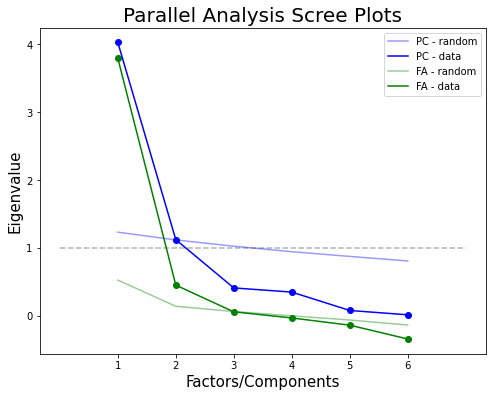

In [78]:
_HornParallelAnalysis(scaled_num_fac17)

Parallel analysis suggests that the number of factors =  3


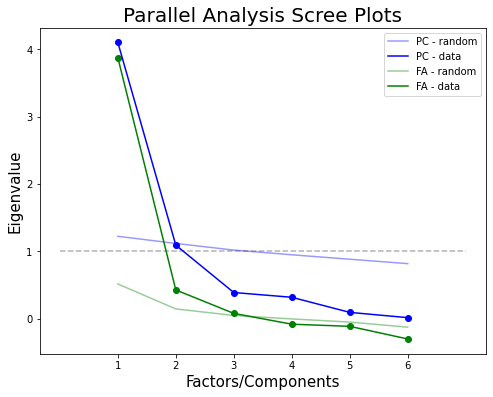

In [79]:
_HornParallelAnalysis(scaled_num_fac18)

Parallel analysis suggests that the number of factors =  3


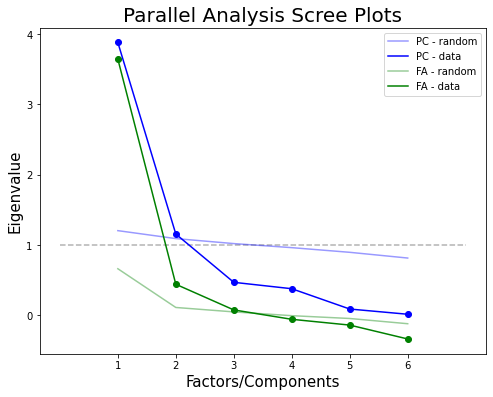

In [80]:
_HornParallelAnalysis(scaled_num_fac19)

### Factor Analysis

Oblique rotation will be applied so that it allows factors to be correlated to each other.

In [92]:
# Loadings
# how much factor explains a variable
fa17 = FactorAnalyzer(n_factors = 2, rotation='oblimin')
fa17.fit(scaled_num_fac17)
print(pd.DataFrame(fa17.loadings_, index=scaled_num_fac17.columns))

                                0         1
resource_allocation      0.880057  0.135798
neighborhood_overlap     0.101776  0.939958
num_common_neighbors     0.834451  0.241917
preferential_attachment  1.038180 -0.164775
weight                   0.706030  0.023471
betweenness              0.143664 -0.640817


Factor 1: RA, Common Neighbors, Preferential Attachment, Weight

Factor 2: Neighborhood Overlap, Betweenness (negative)

In [86]:
# Loadings
# how much factor explains a variable
fa18 = FactorAnalyzer(n_factors = 3, rotation='oblimin', use_smc = False)
fa18.fit(scaled_num_fac18)
print(pd.DataFrame(fa18.loadings_, index=scaled_num_fac18.columns))

                                0         1         2
resource_allocation      0.049480  0.911284  0.079178
neighborhood_overlap     0.011218  0.195443  0.858421
num_common_neighbors     0.749201  0.067218  0.305155
preferential_attachment  0.998111  0.043549 -0.098285
weight                   0.068609  0.757043 -0.057173
betweenness             -0.113372  0.248685 -0.635987


Factor 1: Common Neighbors, PA

Factor 2: RA, Weight

Factor 3: Neighborhood Overlap, Betweenness (negative)

In [87]:
# Loadings
# how much factor explains a variable
fa19 = FactorAnalyzer(n_factors = 3, rotation='oblimin')
fa19.fit(scaled_num_fac19)
print(pd.DataFrame(fa19.loadings_, index=scaled_num_fac19.columns))

                                0         1         2
resource_allocation      0.085590  0.892542  0.056769
neighborhood_overlap    -0.007308  0.187721  0.852740
num_common_neighbors     0.736606  0.095576  0.306309
preferential_attachment  1.005774  0.033630 -0.098667
weight                   0.020549  0.702614 -0.027709
betweenness             -0.101277  0.266392 -0.635432


Factor 1: Common Neighbors, PA

Factor 2: RA, Weight

Factor 3: Neighborhood Overlap, Betweeness (negative)

In [89]:
# Variance

print(pd.DataFrame(fa17.get_factor_variance(), index=['Variance', 'Proportional Var', 'Cumulative Var']))
print(pd.DataFrame(fa18.get_factor_variance(), index=['Variance', 'Proportional Var', 'Cumulative Var']))
print(pd.DataFrame(fa19.get_factor_variance(), index=['Variance', 'Proportional Var', 'Cumulative Var']))

                         0         1
Variance          3.078103  1.398833
Proportional Var  0.513017  0.233139
Cumulative Var    0.513017  0.746156
                         0         1         2
Variance          1.577662  1.510009  1.253684
Proportional Var  0.262944  0.251668  0.208947
Cumulative Var    0.262944  0.514612  0.723559
                         0         1         2
Variance          1.572227  1.406768  1.238490
Proportional Var  0.262038  0.234461  0.206415
Cumulative Var    0.262038  0.496499  0.702914


In [90]:
# communalities
# proportion of each variable's variance that can be explained by the factors

print(pd.DataFrame(fa17.get_communalities(), index=num_fac17.columns, columns=['Communalities']))
print(pd.DataFrame(fa18.get_communalities(), index=num_fac18.columns, columns=['Communalities']))
print(pd.DataFrame(fa19.get_communalities(), index=num_fac19.columns, columns=['Communalities']))


                         Communalities
resource_allocation           0.792941
neighborhood_overlap          0.893879
num_common_neighbors          0.754833
preferential_attachment       1.104969
weight                        0.499030
betweenness                   0.431285
                         Communalities
resource_allocation           0.839155
neighborhood_overlap          0.775211
num_common_neighbors          0.658940
preferential_attachment       1.007781
weight                        0.581091
betweenness                   0.479177
                         Communalities
resource_allocation           0.807180
neighborhood_overlap          0.762458
num_common_neighbors          0.645548
preferential_attachment       1.022447
weight                        0.494857
betweenness                   0.484996
